In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/Filter2/results_rnn.json') as f:
    data = json.load(f)

print(data)

[{'R2': -0.0006739644500621811, 'MAE': 0.100809837180356, 'RMSE': 0.13017160218107018, 'Number of Hidden Layers': 256, 'Learning Rate': 0.1, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 23.418301105499268}, {'R2': -0.11934975039601259, 'MAE': 0.0999232983864403, 'RMSE': 0.13767429252579916, 'Number of Hidden Layers': 128, 'Learning Rate': 0.1, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 12.775510787963867}, {'R2': -3.194728729805151, 'MAE': 0.24319307181756614, 'RMSE': 0.26651514317451325, 'Number of Hidden Layers': 128, 'Learning Rate': 0.1, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 21.178322315216064}, {'R2': -0.12462175113211704, 'MAE': 0.10795125967010803, 'RMSE': 0.1379981262284828, 'Number of Hidden Layers': 128, 'Learning Rate': 0.01, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 21.183664560317993}, {'R2': -0.03114602977913683, 'MAE': 0.09672507126925368, 'RMSE': 0.13213870218

In [5]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df.head()

,R2,MAE,RMSE,Number of Hidden Layers,Learning Rate,Number of Epochs,Number of Iterations,training_time
0,-0.000674,0.100810,0.130172,256,0.10,200,10,23.418301
1,-0.119350,0.099923,0.137674,128,0.10,200,10,12.775511
2,-3.194729,0.243193,0.266515,128,0.10,200,10,21.178322
3,-0.124622,0.107951,0.137998,128,0.01,200,10,21.183665
4,-0.031146,0.096725,0.132139,64,0.01,200,10,12.002447


# Plot

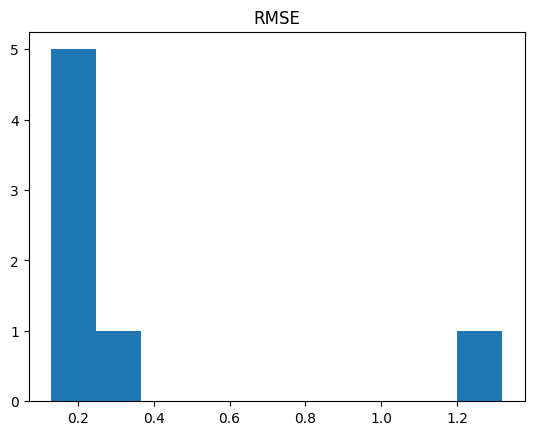

In [6]:
ax = df.hist(column='RMSE', grid=False)

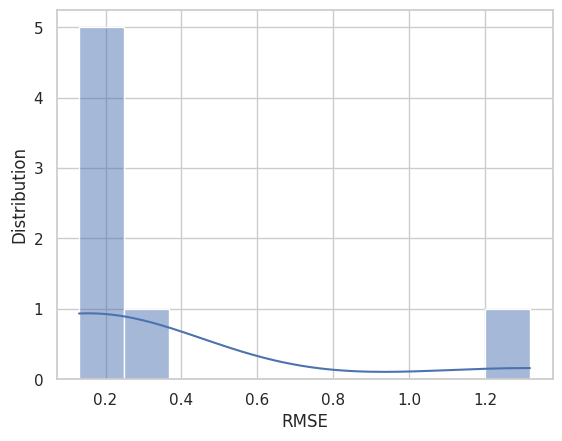

In [7]:
sns.set(style="whitegrid")

ax = sns.histplot(data=df, x='RMSE', kde=True, bins=10)

ax.set_ylabel('Distribution')

plt.show()

# Select the best data

In [8]:
mu = df['RMSE'].mean()
std = df['RMSE'].std()

print(f"mean: {round(mu, 2)}")
print(f"standard deviation: {round(std, 2)}")

mean: 0.32
standard deviation: 0.44


In [9]:
subset = df[(df["RMSE"] < mu + 2*std) & ( df["R2"] >0)]
subset.sort_values(by=['R2'], inplace=True, ascending=False)

subset = subset.iloc[:5]

subset

<ipython-input-9-402a4b7284b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by=['R2'], inplace=True, ascending=False)


,R2,MAE,RMSE,Number of Hidden Layers,Learning Rate,Number of Epochs,Number of Iterations,training_time
